In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [9]:
def truncate(num,decimal_places):
    dp = str(decimal_places)
    return float(re.sub(r'^(\d+\.\d{,'+re.escape(dp)+r'})\d*$',r'\1',str(num)))

In [25]:
def plot_heatmap(title, df, savepath, annotation=True):
    df = df.applymap(lambda x: truncate(x, 2))
    if len(df) <= 6:
        figsize = (9, 6)
    else:
        figsize = (9, len(df)//1.5)
    # Draw a heatmap with the numeric values in each cell
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    sns.heatmap(df, annot=annotation, fmt=".2f", linewidths=.5, ax=ax, cmap=sns.cm.rocket_r, square=True, vmin=0, vmax=1)
    plt.yticks(rotation=0)
    plt.show()
    fig.savefig(savepath, bbox_inches="tight")

In [3]:
m9 = pd.read_csv("M9/results/classification_results.csv", header=0, index_col=0)
m10 = pd.read_csv("M10/results/classification_results.csv", header=0, index_col=0)

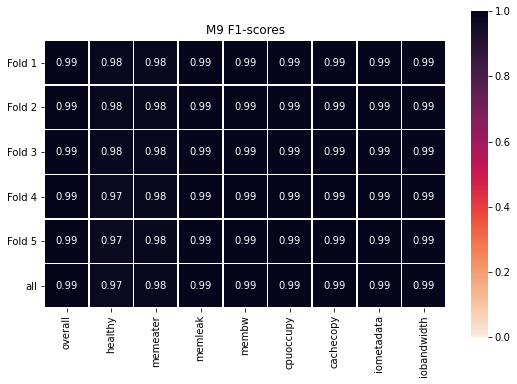

In [26]:
plot_heatmap("M9 F1-scores", m9, "M9/results/classification_results_image_fixedgradient.png")

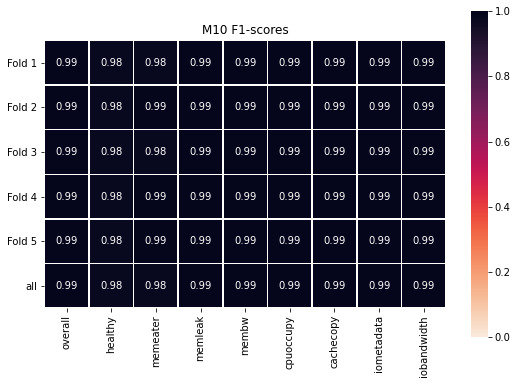

In [27]:
plot_heatmap("M10 F1-scores", m10, "M10/results/classification_results_image_fixedgradient.png")

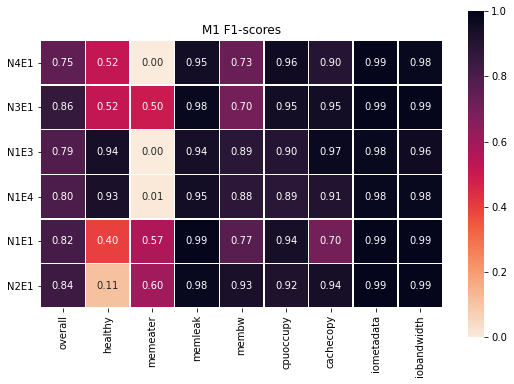

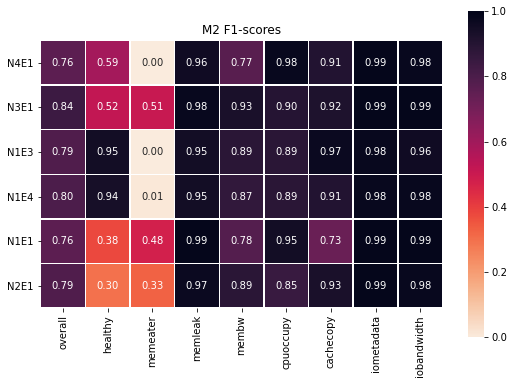

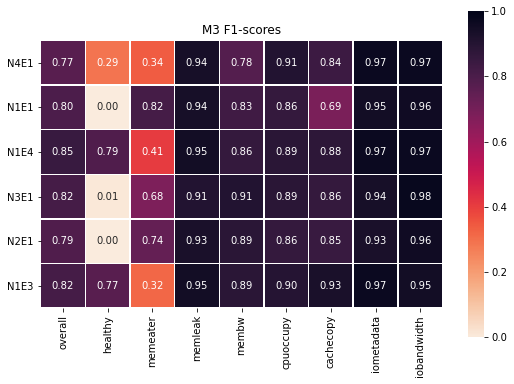

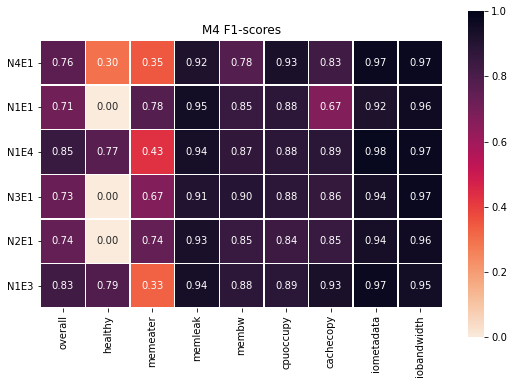

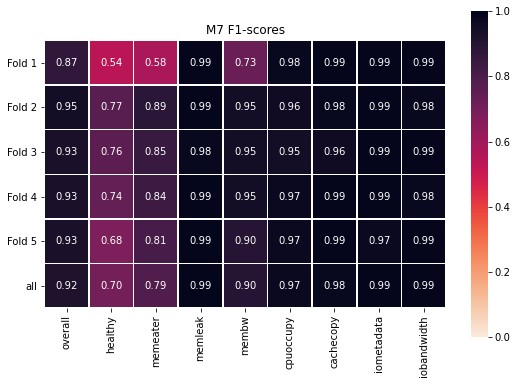

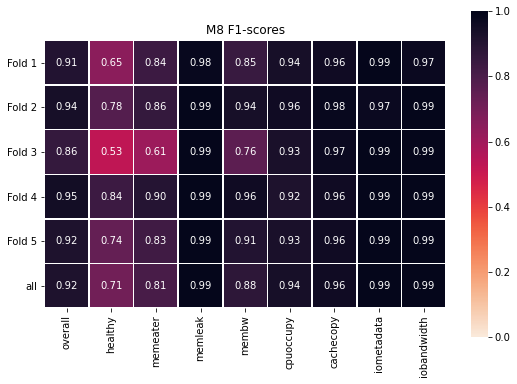

In [30]:
paths = ["M1/results/", "M2/results/", "M3/results/", "M4/results/", "M7/results/", "M8/results/"]
titles = ["M1 F1-scores", "M2 F1-scores", "M3 F1-scores", "M4 F1-scores", "M7 F1-scores", "M8 F1-scores"]

for (path, title) in zip(paths, titles):
    readfile = path + "classification_results.csv"
    saveimg = path + "classification_results_image_fixedgradient.png"
    df = pd.read_csv(readfile, header=0, index_col=0)
    plot_heatmap(title, df, saveimg)